# UNDERSTANDING SUICIDE RATES

### DATA MINING PROJECT BY RUTH AKOR

## Introduction

With the high rate of suicide and depression all over the world, more individuals and organisations are chanelling more efforts into mental health issues, in a bid to understand the reason for suicide and depression and reduce it.

The aim of this project is to analyse the trend in suicide rates globally and see what countries, age groups and gender have highest suicide rates. This will help WHO and other health agencies in tackling the painful issue of suicide

#### Data Source - Gapminder.org

#### Time Frame - 1950 - 2016

#### The dataset is a zipped file of several CSV and excel files containing suicide rates disaggregated by age, gender and countries

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
% matplotlib inline
import plotly
import numpy as np
import plotly.graph_objs as go
import chart_studio.plotly as py
py.sign_in('ruthakor', '1HgVOfW0VLt2QnLKh0Al')
print(plotly.__version__)

4.2.0


In [2]:
# import the data
totalsuicide = pd.read_excel("suicide_total_deaths.xlsx")
totalsuicide.columns

Index(['country',      1990,      1991,      1992,      1993,      1994,
            1995,      1996,      1997,      1998,      1999,      2000,
            2001,      2002,      2003,      2004,      2005,      2006,
            2007,      2008,      2009,      2010,      2011,      2012,
            2013,      2014,      2015,      2016],
      dtype='object')

### LATEST NUMBER OF DEATHS GLOBALLY BY SUICIDE (2016)

In [3]:
totalsuicide.columns = ['country', 'yr1990', 'yr1991', 'yr1992', 'yr1993', 'yr1994', 'yr1995', 'yr1996', 'yr1997', 'yr1998', 
                        'yr1999', 'yr2000','yr2001', 'yr2002', 'yr2003', 'yr2004', 'yr2005', 'yr2006', 'yr2007', 'yr2008', 
                        'yr2009', 'yr2010', 'yr2011','yr2012', 'yr2013', 'yr2014', 'yr2015', 'yr2016']
totalsuicide.head()

,country,yr1990,yr1991,yr1992,yr1993,yr1994,yr1995,yr1996,yr1997,yr1998,...,yr2007,yr2008,yr2009,yr2010,yr2011,yr2012,yr2013,yr2014,yr2015,yr2016
0,Afghanistan,703.00,754.00,820.00,894.00,977.00,1050.00,1100.00,1130.00,1170.00,...,1680.00,1710.00,1750.00,1760.00,1810.00,1870.00,1990.00,2080.00,2170.00,2250.00
1,Albania,127.00,130.00,131.00,135.00,136.00,142.00,150.00,162.00,170.00,...,204.00,205.00,201.00,195.00,191.00,188.00,186.00,184.00,183.00,181.00
2,Algeria,806.00,822.00,843.00,866.00,888.00,912.00,941.00,983.00,1020.00,...,1240.00,1250.00,1270.00,1290.00,1310.00,1340.00,1370.00,1410.00,1420.00,1440.00
3,Andorra,5.45,5.82,6.18,6.33,6.36,6.17,6.04,6.28,6.24,...,7.39,7.53,7.67,7.76,7.85,7.92,7.97,7.72,7.78,7.84
4,Angola,645.00,653.00,667.00,700.00,735.00,756.00,738.00,738.00,816.00,...,1040.00,1060.00,1080.00,1100.00,1120.00,1140.00,1170.00,1200.00,1220.00,1230.00


In [4]:
# Mapping deaths from suicide globally in 2016

#set scale and color ranges
scale = [[0.0, 'rgb(88, 158, 92)'], [0.2, 'rgb(223,221,228)'],
         [0.4, 'rgb(169,170,201)'], [0.6, 'rgb(139,135,181)'],
         [0.8, 'rgb(158, 88, 142)'],   [1.0, 'rgb(255,0,0)']]

#dataset to be graphed
data = [dict(type='choropleth', 
             colorscale=scale, 
             locations=totalsuicide['country'],
             z=totalsuicide['yr2016'].astype(float),
             locationmode='country names',
             text=totalsuicide['country'],
             hoverinfo='location+z',
             marker=dict(line=dict(color='rgb(255,255,255)', width=2)),
             colorbar=dict(title='Global suicide deaths in 2016'))]

#layout
layout = dict(title='Global suicide deaths in 2016 <br />(Hover for each country)',
              geo=dict(scope='world', 
                       projection=dict(type='equirectangular'),
                       showlakes=True,
                       lakecolor='rgb(95,145,237)'))

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='DATS 6103 - Individual Project 3 - Ruth Akor')

From the map above, india records the highest death from suicide in 2016

### GLOBAL TREND IN TOTAL SUICIDE DEATHS FROM 1990 TO 2016

In this section, I would love to see if suicide has been increasing or decreasing

In [8]:
totalsuicide.set_index("country",drop=True,inplace=True)
totalsuicide

,yr1990,yr1991,yr1992,yr1993,yr1994,yr1995,yr1996,yr1997,yr1998,yr1999,...,yr2007,yr2008,yr2009,yr2010,yr2011,yr2012,yr2013,yr2014,yr2015,yr2016
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,703.00,754.00,820.00,894.00,977.00,1050.00,1100.00,1130.00,1170.00,1200.00,...,1680.00,1710.00,1750.00,1760.00,1810.00,1870.00,1990.00,2080.00,2170.00,2250.00
Albania,127.00,130.00,131.00,135.00,136.00,142.00,150.00,162.00,170.00,175.00,...,204.00,205.00,201.00,195.00,191.00,188.00,186.00,184.00,183.00,181.00
Algeria,806.00,822.00,843.00,866.00,888.00,912.00,941.00,983.00,1020.00,1060.00,...,1240.00,1250.00,1270.00,1290.00,1310.00,1340.00,1370.00,1410.00,1420.00,1440.00
Andorra,5.45,5.82,6.18,6.33,6.36,6.17,6.04,6.28,6.24,6.20,...,7.39,7.53,7.67,7.76,7.85,7.92,7.97,7.72,7.78,7.84
Angola,645.00,653.00,667.00,700.00,735.00,756.00,738.00,738.00,816.00,809.00,...,1040.00,1060.00,1080.00,1100.00,1120.00,1140.00,1170.00,1200.00,1220.00,1230.00
Antigua and Barbuda,1.27,1.30,1.32,1.34,1.36,1.41,1.44,1.49,1.61,1.64,...,1.93,1.98,2.02,2.07,2.12,2.04,2.03,2.10,2.11,2.13
Argentina,3300.00,3420.00,3580.00,3720.00,3890.00,4020.00,4160.00,4290.00,4360.00,4440.00,...,4560.00,4610.00,4640.00,4650.00,4700.00,4800.00,4920.00,5010.00,5010.00,5010.00
Armenia,134.00,136.00,146.00,155.00,158.00,160.00,158.00,149.00,143.00,142.00,...,206.00,219.00,225.00,232.00,241.00,257.00,255.00,254.00,257.00,252.00
Australia,2360.00,2380.00,2390.00,2380.00,2440.00,2500.00,2550.00,2630.00,2650.00,2610.00,...,2510.00,2560.00,2600.00,2630.00,2650.00,2690.00,2700.00,2770.00,2790.00,2830.00


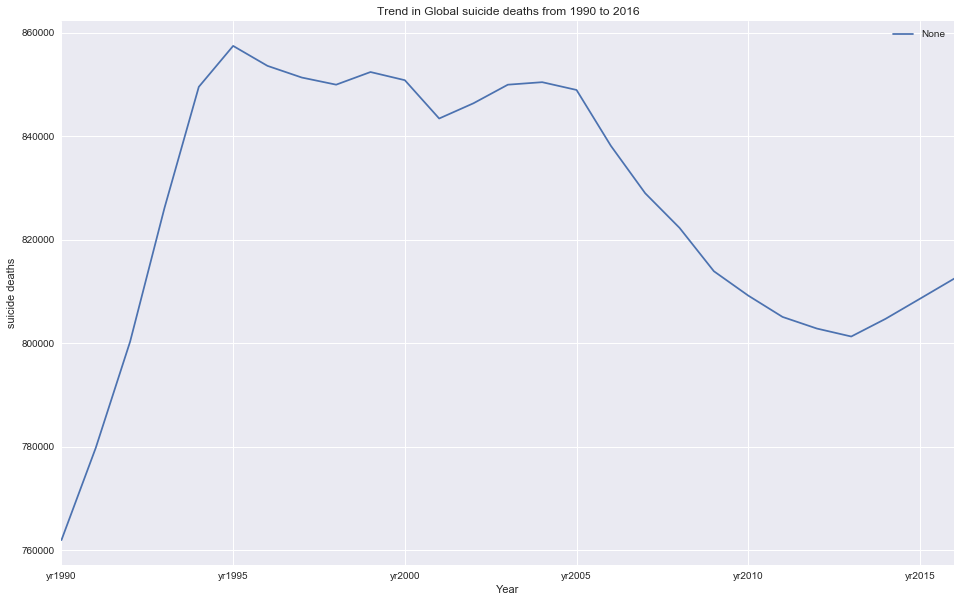

In [9]:
ax = totalsuicide.sum().plot(legend=True, figsize=(16,10), title='Trend in Global suicide deaths from 1990 to 2016')
ax.set_xlabel("Year")
ax.set_ylabel('suicide deaths')
plt.show()

Deaths from suicide have been declining since 2005 but started increasing again at 2013 but is not as high as it was in the 90's'

### HIGHEST SUICIDE DEATHS BY COUNTRY IN 2016

In [10]:
#trying to convert from object to float
totalsuicide["yr2016"] = pd.to_numeric(totalsuicide.yr2016, errors='coerce')

In [11]:
def PiePlot(Year):
    df = totalsuicide[Year]
    result = df.sort_values(ascending=False)
    result = result.reset_index()
    result.index = result.index + 1
    others = result[10:].sum()[1]
    top = result[:10]
    top.loc[11] = ['All Other Countries', others]
    
    countryPlot = top[Year].plot.pie(subplots=True,
                                     autopct='%0.1f',
                                     fontsize=10,
                                     figsize=(10,10),
                                     legend=False,
                                     labels=top['country'],
                                     shadow=False,
                                     explode=(0.15,0.12,0,0,0,0,0,0,0,0,0),
                                     startangle=90)
    countryPlot[0].set_ylabel('')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



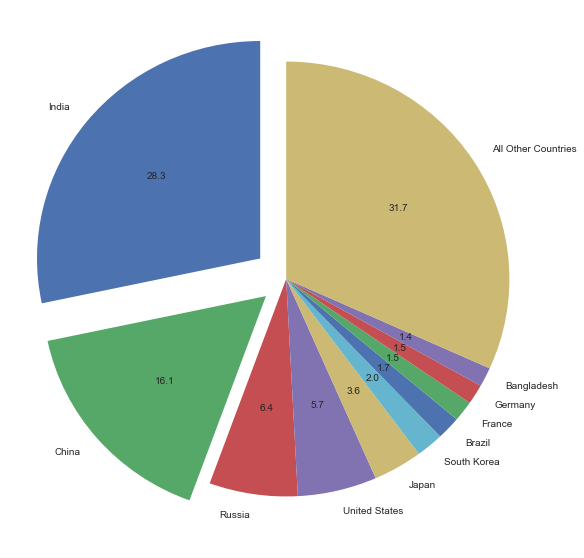

In [12]:
PiePlot('yr2016')
plt.show()

From the map and pieplot, it appears India has the highest number of suicide deaths, however India and China have very high populations so it may be helpful to consider the suicide rates relative to total population

### NOW LOOKING AT SUICIDE DEATHS RELATIVE TO TOTAL POPULATION

#### HIGHEST SUICIDE RATES IN 2016 (RELATIVE TO TOTAL POPULATION)

In [13]:
suiciderate = pd.read_excel("suicidemortalityrate.xlsx")
suiciderate

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,5.7,NaN,NaN,NaN,NaN,6.3,NaN,NaN,NaN,NaN,5.1,NaN,NaN,NaN,NaN,4.8,4.7
1,Albania,5.5,NaN,NaN,NaN,NaN,6.7,NaN,NaN,NaN,NaN,7.8,NaN,NaN,NaN,NaN,6.0,6.3
2,Algeria,4.1,NaN,NaN,NaN,NaN,3.8,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,3.2,3.2
3,Angola,7.9,NaN,NaN,NaN,NaN,7.2,NaN,NaN,NaN,NaN,5.7,NaN,NaN,NaN,NaN,5.0,4.7
4,Antigua and Barbuda,2.0,NaN,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,NaN,0.8,0.5
5,Argentina,9.5,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,8.7,NaN,NaN,NaN,NaN,8.8,9.2
6,Armenia,3.3,NaN,NaN,NaN,NaN,4.4,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,7.0,6.6
7,Australia,13.2,NaN,NaN,NaN,NaN,12.3,NaN,NaN,NaN,NaN,12.5,NaN,NaN,NaN,NaN,13.8,13.2
8,Austria,20.0,NaN,NaN,NaN,NaN,17.3,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,16.0,15.6
9,Azerbaijan,2.2,NaN,NaN,NaN,NaN,3.2,NaN,NaN,NaN,NaN,3.1,NaN,NaN,NaN,NaN,2.7,2.6


In [14]:
suiciderate.columns = ['country', 'yr2000','yr2001', 'yr2002', 'yr2003', 'yr2004', 'yr2005', 'yr2006', 'yr2007', 'yr2008', 
                        'yr2009', 'yr2010', 'yr2011','yr2012', 'yr2013', 'yr2014', 'yr2015', 'yr2016']
suiciderate.head()

,country,yr2000,yr2001,yr2002,yr2003,yr2004,yr2005,yr2006,yr2007,yr2008,yr2009,yr2010,yr2011,yr2012,yr2013,yr2014,yr2015,yr2016
0,Afghanistan,5.7,NaN,NaN,NaN,NaN,6.3,NaN,NaN,NaN,NaN,5.1,NaN,NaN,NaN,NaN,4.8,4.7
1,Albania,5.5,NaN,NaN,NaN,NaN,6.7,NaN,NaN,NaN,NaN,7.8,NaN,NaN,NaN,NaN,6.0,6.3
2,Algeria,4.1,NaN,NaN,NaN,NaN,3.8,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,3.2,3.2
3,Angola,7.9,NaN,NaN,NaN,NaN,7.2,NaN,NaN,NaN,NaN,5.7,NaN,NaN,NaN,NaN,5.0,4.7
4,Antigua and Barbuda,2.0,NaN,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,NaN,0.8,0.5


In [15]:
#trying to convert from object to float
suiciderate["yr2016"] = pd.to_numeric(suiciderate.yr2016, errors='coerce')

In [16]:
# Mapping deaths from suicide rates globally in 2016

#set scale and color ranges
scale = [[0.0, 'rgb(29, 180, 240)'], [0.2, 'rgb(223,221,228)'],
         [0.4, 'rgb(169,170,201)'], [0.6, 'rgb(139,135,181)'],
         [0.8, 'rgb(236, 240, 29)'],   [1.0, 'rgb(255,0,0)']]

#dataset to be graphed
data = [dict(type='choropleth', 
             colorscale=scale, 
             locations=suiciderate['country'],
             z=suiciderate['yr2016'].astype(float),
             locationmode='country names',
             text=suiciderate['country'],
             hoverinfo='location+z',
             marker=dict(line=dict(color='rgb(255,255,255)', width=2)),
             colorbar=dict(title='Global suicide rate in 2016'))]

#layout
layout = dict(title='Global suicide rate in 2016 <br />(Hover for each country)',
              geo=dict(scope='world', 
                       projection=dict(type='equirectangular'),
                       showlakes=True,
                       lakecolor='rgb(95,145,237)'))

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='DATS 6103 - Individual Project 3 - Ruth Akor')

By considering suicide rates relative to each country's population, Lithuania, Russia and Guyana become the countries with the highest suicide rates in 2016

In [17]:
#trying to convert from object to float
suiciderate["yr2016"] = pd.to_numeric(suiciderate.yr2016, errors='coerce')

In [18]:
#Plotting the suicide rate for countries with top 10 highest suicide rates in 2016
top10suicide = suiciderate.nlargest(10, ['yr2016'])
top10suicide.set_index("country",drop=True,inplace=True)
top10suicide

,yr2000,yr2001,yr2002,yr2003,yr2004,yr2005,yr2006,yr2007,yr2008,yr2009,yr2010,yr2011,yr2012,yr2013,yr2014,yr2015,yr2016
country,,,,,,,,,,,,,,,,,
Lithuania,50.7,NaN,NaN,NaN,NaN,43.9,NaN,NaN,NaN,NaN,37.3,NaN,NaN,NaN,NaN,34.9,31.9
Russia,52.6,NaN,NaN,NaN,NaN,51.6,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,32.1,31.0
Guyana,23.4,NaN,NaN,NaN,NaN,24.4,NaN,NaN,NaN,NaN,26.8,NaN,NaN,NaN,NaN,29.1,29.2
South Korea,14.8,NaN,NaN,NaN,NaN,26.8,NaN,NaN,NaN,NaN,34.1,NaN,NaN,NaN,NaN,28.3,26.9
Belarus,43.1,NaN,NaN,NaN,NaN,45.1,NaN,NaN,NaN,NaN,38.2,NaN,NaN,NaN,NaN,26.3,26.2
Suriname,23.5,NaN,NaN,NaN,NaN,26.5,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,23.8,22.8
Kazakhstan,34.0,NaN,NaN,NaN,NaN,39.4,NaN,NaN,NaN,NaN,32.7,NaN,NaN,NaN,NaN,24.9,22.5
Ukraine,36.9,NaN,NaN,NaN,NaN,34.5,NaN,NaN,NaN,NaN,27.1,NaN,NaN,NaN,NaN,23.1,22.4
Latvia,34.7,NaN,NaN,NaN,NaN,26.7,NaN,NaN,NaN,NaN,22.7,NaN,NaN,NaN,NaN,21.6,21.2


In [19]:
top10suicide = top10suicide.loc[:,['yr2016']]
top10suicide

,yr2016
country,
Lithuania,31.9
Russia,31.0
Guyana,29.2
South Korea,26.9
Belarus,26.2
Suriname,22.8
Kazakhstan,22.5
Ukraine,22.4
Latvia,21.2


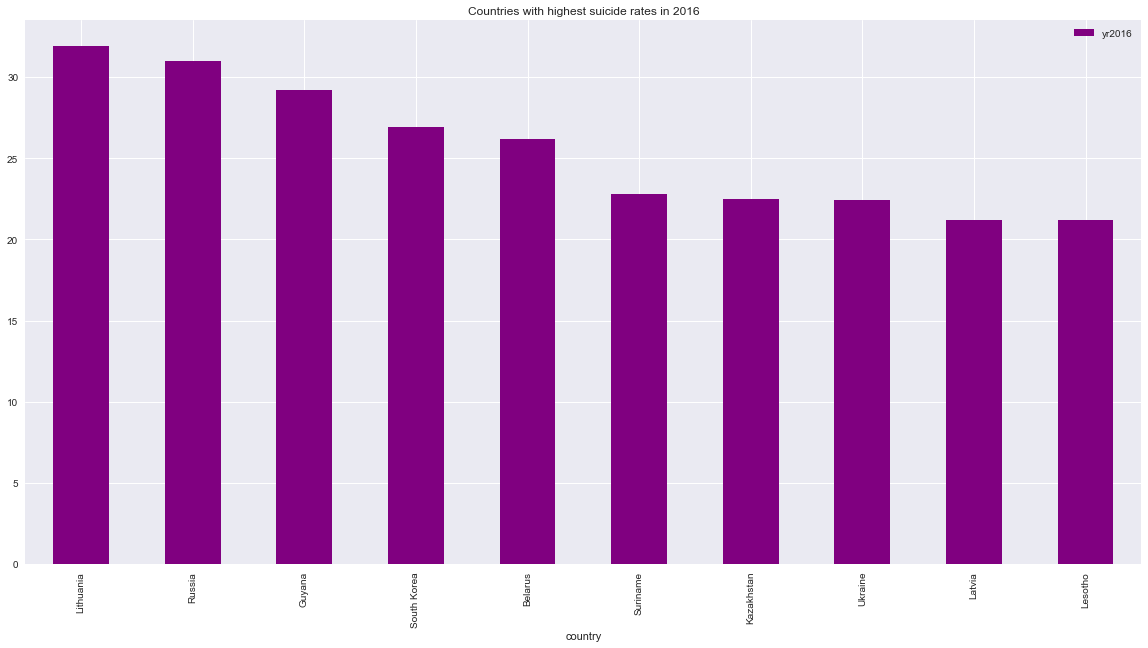

In [20]:
plot_top10suicide = top10suicide.plot(kind='bar',figsize=(20,10), color='purple', title='Countries with highest suicide rates in 2016')
plt.legend(loc='best', fontsize=10)
plt.show()

### SUICIDE RATES BY AGE GROUP

Using a CSV file of WHO statistics, I would love to analyse suicide rate by the following age groups: 
1. 5 - 14 years
2. 15 - 24 years
3. 25 - 34 years
4. 35 - 54 years
5. 55 - 74 years
6. 75+ years

In [21]:
who_stat = pd.read_csv("who_suicide_statistics.csv")
who_stat.head(10)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


In [22]:
#renaming the age groups to remove 'years'
who_stat.loc[:, 'age'] = who_stat['age'].str.replace(' years','')
who_stat.loc[who_stat['age'] == '5-14', 'age'] = '05-14'
who_stat

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24,NaN,277900.0
1,Albania,1985,female,25-34,NaN,246800.0
2,Albania,1985,female,35-54,NaN,267500.0
3,Albania,1985,female,05-14,NaN,298300.0
4,Albania,1985,female,55-74,NaN,138700.0
5,Albania,1985,female,75+,NaN,34200.0
6,Albania,1985,male,15-24,NaN,301400.0
7,Albania,1985,male,25-34,NaN,264200.0
8,Albania,1985,male,35-54,NaN,296700.0
9,Albania,1985,male,05-14,NaN,325800.0


In [23]:
#drop population column
who_stat = who_stat.drop(['population'], axis=1)
who_stat.head()

,country,year,sex,age,suicides_no
0,Albania,1985,female,15-24,NaN
1,Albania,1985,female,25-34,NaN
2,Albania,1985,female,35-54,NaN
3,Albania,1985,female,05-14,NaN
4,Albania,1985,female,55-74,NaN


In [24]:
#subset all suicide deaths for age group 5 to 14
age5to14 = who_stat.loc[who_stat['age']== '05-14']
newage5to14 = age5to14.groupby(['year']).sum()
newage5to14.columns = ['age05-14']
newage5to14.head()

,age05-14
year,
1979,635.0
1980,999.0
1981,1186.0
1982,1161.0
1983,993.0


In [25]:
#susbet all suicide death for age group 15 to 24
age15to24 = who_stat.loc[who_stat['age']== '15-24']
newage15to24 = age15to24.groupby(['year']).sum()
newage15to24.columns = ['age15-24']
newage15to24.head()

,age15-24
year,
1979,14701.0
1980,23121.0
1981,25190.0
1982,25068.0
1983,18388.0


In [26]:
#subset all suicide death for age group 25 to 34
age25to34 = who_stat.loc[who_stat['age']== '25-34']
newage25to34 = age25to34.groupby(['year']).sum()
newage25to34.columns = ['age25-34']
newage25to34.head()

,age25-34
year,
1979,17149.0
1980,29358.0
1981,34369.0
1982,35536.0
1983,22454.0


In [27]:
#susbet all suicide death for age group 35 to 54
age35to54 = who_stat.loc[who_stat['age']== '35-54']
newage35to54 = age35to54.groupby(['year']).sum()
newage35to54.columns = ['age35-54']
newage35to54.head()

,age35-54
year,
1979,28614.0
1980,53525.0
1981,64006.0
1982,65017.0
1983,38472.0


In [28]:
#susbet all suicide death for age group 55 to 74
age55to74 = who_stat.loc[who_stat['age']== '55-74']
newage55to74 = age55to74.groupby(['year']).sum()
newage55to74.columns = ['age55-74']
newage55to74.head()

,age55-74
year,
1979,23270.0
1980,34566.0
1981,40002.0
1982,41862.0
1983,30275.0


In [29]:
#susbet all suicide death for age group 75+
age75plus = who_stat.loc[who_stat['age']== '75+']
newage75plus = age75plus.groupby(['year']).sum()
newage75plus.columns = ['age75plus']
newage75plus.head()

,age75plus
year,
1979,8421.0
1980,11979.0
1981,13261.0
1982,14249.0
1983,11848.0


In [30]:
#join all age groups into one dataframe
data = newage5to14.join(newage15to24).join(newage25to34).join(newage35to54).join(newage55to74).join(newage75plus)
data.head()

,age05-14,age15-24,age25-34,age35-54,age55-74,age75plus
year,,,,,,
1979,635.0,14701.0,17149.0,28614.0,23270.0,8421.0
1980,999.0,23121.0,29358.0,53525.0,34566.0,11979.0
1981,1186.0,25190.0,34369.0,64006.0,40002.0,13261.0
1982,1161.0,25068.0,35536.0,65017.0,41862.0,14249.0
1983,993.0,18388.0,22454.0,38472.0,30275.0,11848.0


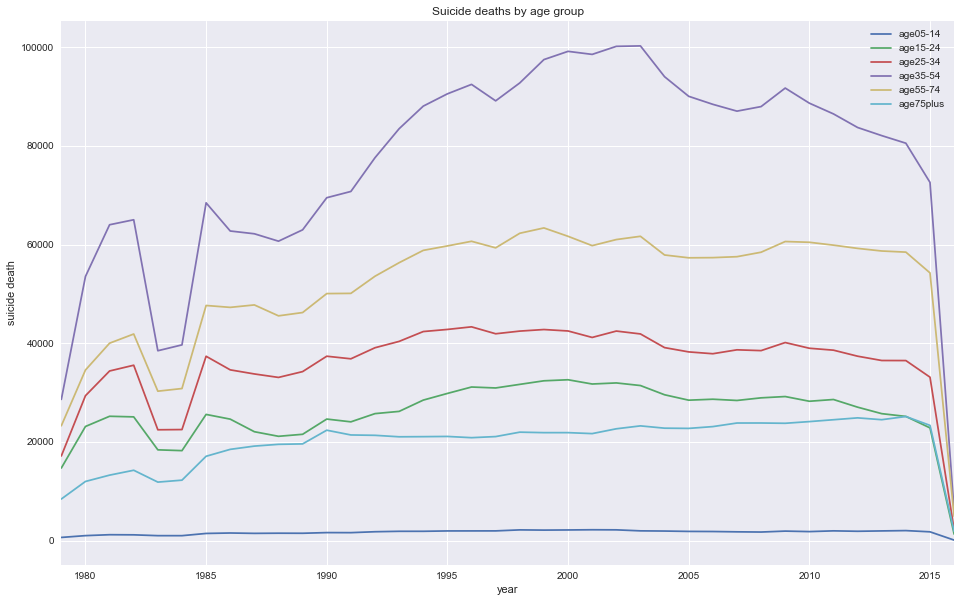

In [31]:
agegroup_plot = data.plot.line(legend=True, figsize=(16,10), title='Suicide deaths by age group')
agegroup_plot.set_ylabel('suicide death')
plt.show()

Age group 35 to 54 has had the highest number of suicide deaths since 1979. This can be explained by the fact that many people in this age bracket are at the peak of their careers with families and so many responsibilities trying to figure out life.

### SUICIDE RATE BY GENDER

In this section, I consider suicide rate by gender to see whether men or women commit more suicide

In [32]:
#subset all suicide deaths by gender
malesuicide = who_stat.loc[who_stat['sex']== 'male']
newmalesuicide = malesuicide.groupby(['year']).sum()
newmalesuicide.columns = ['male']
newmalesuicide.head()

,male
year,
1979,63372.0
1980,110886.0
1981,130484.0
1982,135212.0
1983,87607.0


In [33]:
femalesuicide = who_stat.loc[who_stat['sex']== 'female']
newfemalesuicide = femalesuicide.groupby(['year']).sum()
newfemalesuicide.columns = ['female']
newfemalesuicide.head()

,female
year,
1979,29418.0
1980,42662.0
1981,47530.0
1982,47681.0
1983,34823.0


In [34]:
#join all gender into one dataframe
genderdata = newmalesuicide.join(newfemalesuicide)
genderdata.head()

,male,female
year,,
1979,63372.0,29418.0
1980,110886.0,42662.0
1981,130484.0,47530.0
1982,135212.0,47681.0
1983,87607.0,34823.0


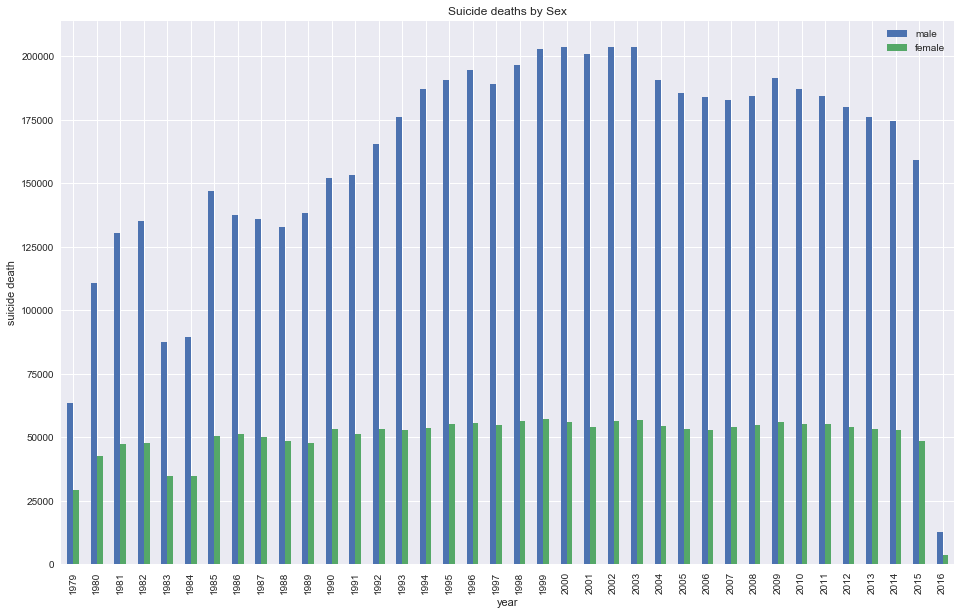

In [35]:
gender_plot = genderdata.plot(kind='bar', legend=True, figsize=(16,10), title='Suicide deaths by Sex')
gender_plot.set_ylabel('suicide death')
plt.show()

We have more males committing suicide all over the world than females

### WHAT COUNTRIES HAVE THE HIGHEST FEMALE SUICIDE RATE ON AVERAGE

In [36]:
#import the data
suicidewomen = pd.read_excel("suicide_women_per_100000_people.xlsx")
suicidewomen

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0400,3.9200,NaN,2.280,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0200,NaN,NaN,NaN,1.080,1.130,0.7570,0.9690,0.673
3,Australia,4.56,4.57,5.15,5.89,5.38,5.320,5.730,6.7600,6.1400,...,4.5500,4.3100,4.520,4.490,4.740,5.290,5.200,5.5500,5.7100,NaN
4,Austria,NaN,NaN,NaN,NaN,NaN,13.000,12.300,12.5000,12.6000,...,5.1100,5.0200,4.900,4.870,5.260,4.320,5.230,5.0700,4.5500,4.830
5,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Bahamas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1800,1.5200,1.010,0.676,1.140,NaN,NaN,0.1410,NaN,NaN
8,Barbados,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is a lot of missing data in this excel file on suicide rate for women per 100,000 people so I will take the average of suicide rates for each country from 1950 to 2016 to see which countries have highest suicide rates on average over those years

In [37]:
#create a column for the mean suicide rate for each country
suicidewomen['mean'] = suicidewomen.mean(axis=1)
suicidewomen.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,mean
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.92,NaN,2.28,NaN,NaN,NaN,NaN,NaN,NaN,2.322316
1,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.746800
2,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.02,NaN,NaN,NaN,1.08,1.13,0.757,0.969,0.673,1.165444
3,Australia,4.56,4.57,5.15,5.89,5.38,5.32,5.73,6.76,6.14,...,4.31,4.52,4.49,4.74,5.29,5.20,5.550,5.710,NaN,6.076154
4,Austria,NaN,NaN,NaN,NaN,NaN,13.00,12.30,12.50,12.60,...,5.02,4.90,4.87,5.26,4.32,5.23,5.070,4.550,4.830,9.471935


In [38]:
#set index to country and sort by mean value
suicidewomen.set_index("country",drop=True,inplace=True)
sort_suicidewomen = suicidewomen.sort_values('mean', ascending=False)
sort_suicidewomen.head(10)

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,mean
country,,,,,,,,,,,,,,,,,,,,,
Cuba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.846154
Hungary,NaN,NaN,NaN,NaN,NaN,12.70,11.20,12.20,13.80,13.90,...,7.30,7.61,7.23,7.36,6.88,6.51,5.81,6.02,5.66,13.814194
Japan,18.50,17.50,17.7,18.70,19.80,20.90,21.10,20.60,22.00,20.00,...,10.30,10.10,9.86,10.80,9.34,9.18,8.83,8.06,NaN,12.531818
Denmark,NaN,14.20,13.6,15.00,14.20,13.70,13.70,13.40,12.20,12.20,...,5.08,3.66,4.24,4.12,4.38,4.41,4.08,4.50,NaN,11.364154
Sri Lanka,5.01,5.74,6.0,5.24,6.66,5.42,5.43,5.60,5.41,6.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.062174
Lithuania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.49,8.27,8.41,8.94,7.60,9.78,7.08,8.00,5.71,10.127941
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.081176
South Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.70,18.50,17.20,16.20,14.20,13.50,12.60,11.90,NaN,9.670968
Austria,NaN,NaN,NaN,NaN,NaN,13.00,12.30,12.50,12.60,12.90,...,5.02,4.90,4.87,5.26,4.32,5.23,5.07,4.55,4.83,9.471935


In [39]:
mean_suicide_female = sort_suicidewomen['mean']
topmeansuiciderate = mean_suicide_female.head(10)
topmeansuiciderate

country
Cuba           14.846154
Hungary        13.814194
Japan          12.531818
Denmark        11.364154
Sri Lanka      11.062174
Lithuania      10.127941
Russia         10.081176
South Korea     9.670968
Austria         9.471935
Switzerland     9.441111
Name: mean, dtype: float64

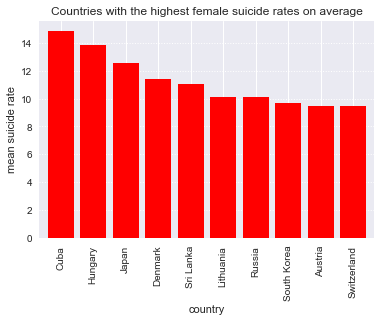

In [40]:
topmeansuiciderate[0:20].plot(  # This is Pandas-style plotting
    x='country', 
    y='mean suicide rate', 
    kind='bar', 
    color='red',
    legend=False,
    width=0.8
)
# Matplotlib styling of the output:
plt.ylabel("mean suicide rate")
plt.xlabel("country")
plt.title("Countries with the highest female suicide rates on average")
plt.gca().yaxis.grid(linestyle=':')

On average, Cuba has the highest female suicide rates since 1950, followed by Hungary, Japan, Denmanrk, Sri Lanka

### WHAT COUNTRIES HAVE THE HIGHEST MALE SUICIDE RATE ON AVERAGE

In [41]:
#import the data
suicidemen = pd.read_excel("suicide_men_per_100000_people.xlsx")
suicidemen.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.23,6.80,NaN,3.86,NaN,NaN,NaN,NaN,NaN,NaN
1,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.69,NaN,NaN,NaN,3.91,2.81,2.52,3.39,3.33
4,Australia,13.9,14.3,16.0,15.8,16.2,15.5,16.0,17.8,19.0,...,15.00,15.70,14.8,15.20,14.8,15.40,15.30,16.90,17.60,NaN


In [42]:
#create a column for the mean suicide rate for males for each country
suicidemen['mean'] = suicidemen.mean(axis=1)
suicidemen.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,mean
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.80,NaN,3.86,NaN,NaN,NaN,NaN,NaN,NaN,4.620000
1,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.290000
2,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.859200
3,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.69,NaN,NaN,NaN,3.91,2.81,2.52,3.39,3.33,3.624444
4,Australia,13.9,14.3,16.0,15.8,16.2,15.5,16.0,17.8,19.0,...,15.70,14.8,15.20,14.8,15.40,15.30,16.90,17.60,NaN,17.540000


In [43]:
#set index to country and sort by mean value
suicidemen.set_index("country",drop=True,inplace=True)
sort_suicidemen = suicidemen.sort_values('mean', ascending=False)
sort_suicidemen.head(10)

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,mean
country,,,,,,,,,,,,,,,,,,,,,
Lithuania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54.4,55.7,49.5,49.8,46.4,54.9,47.7,45.0,42.7,58.623529
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.176471
Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.555556
Latvia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.1,35.8,33.1,32.1,33.2,28.7,28.7,27.7,NaN,43.936111
Hungary,NaN,NaN,NaN,NaN,NaN,29.8,28.8,31.8,33.8,37.9,...,31.8,32.1,32.1,30.7,29.5,25.5,23.9,22.6,20.9,43.243548
Kazakhstan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.2,31.2,28.4,NaN,42.812500
Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.2,29.5,24.5,23.5,25.3,22.6,26.8,22.3,NaN,41.178788
Ukraine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.136364
Slovenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.3,26.7,25.8,25.5,26.3,26.7,23.8,23.6,NaN,36.716129


In [44]:
mean_suicide_male = sort_suicidemen['mean']
topmeansuicide_men = mean_suicide_male.head(10)
topmeansuicide_men

country
Lithuania     58.623529
Russia        53.176471
Belarus       44.555556
Latvia        43.936111
Hungary       43.243548
Kazakhstan    42.812500
Estonia       41.178788
Ukraine       39.136364
Slovenia      36.716129
Finland       34.733333
Name: mean, dtype: float64

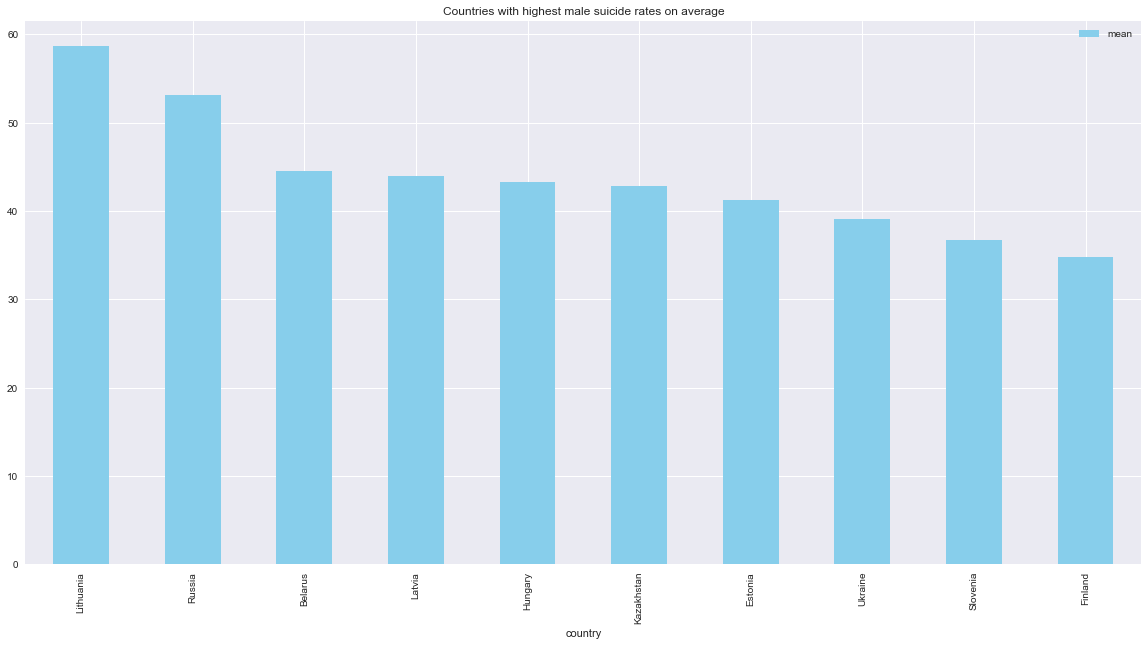

In [45]:
plot_topmeansuicide = topmeansuicide_men.plot(kind='bar',figsize=(20,10), color='skyblue', title='Countries with highest male suicide rates on average')
plt.legend(loc='best', fontsize=10)
plt.show()

On average, Lithuania has had the highest male suicide rate from 1950 to 2016 followed by Russia, Belarus, Latvia, Hungary

# FINDINGS AND LIMITATIONS

From the analysis of the data, there are observed patterns in the data. Using the latest available data (2016), India has the highest number of deaths from suicide, followed by China and Russia. However, when we consider suicide rate which is suicide occurence as a percentage of the total population, Lithuania becomes the country with the highest suicide rate followed by Russia and Guyana.

By analysing the trend in suicide deaths globally, I found that suicide rate rose drastically between 1990 and 1995 after which it declined a little but has since been increasing since 2013. A major limitation is that the latest available data is 2016. With the availability of 2017, 2018 and 2019 suicide statistics, I expect the suicide deaths to be higher owing to the recent prevalence of people committing suicide.

Suicide rate is highest among people within the age bracket of 35 and 54 years followed by those within 55 and 74 years. This is probably because people between 35 and 54 years are in the middle of their life with so many responsibilities, trying to figure out life. This can be a tough period for those that feel they cannot make meaning of their life or life cannot get better.

Through the lens of gender, suicide rate has consistently been higher for the male gender throughout all the years compared to the female gender. Countries with highest male suicide rate on average for all the years are Lithuania, Russia and Belarus respectively. Countries with highest female suicide rate on average are Cuba, Hungary, Japan, Denmark respectively.

Another limitation in this study is the presence of so many missing values in the data, this was why average rates were used for the section on gender.

# CONCLUSION AND FUTURE RESEARCH

For future research, it will be helpful to know the drivers of suicide such as alcohol consumption, drug abuse, unemployment, high debt, poverty, etc. Also, it will be interesting to see the relationship between mental health issues and suicide. 

### REFERENCES

Suicide in the 21st Century - https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/


GapMinder - https://www.gapminder.org/data/